# Cellector: a tool for cell counting

#### by: Mac Englund + Alexia Williams

ideas for things to add?: 

- parameters based on shape (i.e. defining the shape of a circle and only selecting objects that match that shape, then making a new image)
- parameters based on size (i.e. defining how large an object must be, only selecting objects matching that size, make a new image?)
^ we could combine those to, then add a counting function. so basically something like pvncount.matchshape, followed by pvncount.matchsize,
then a counting mechanism. or just turn those both into one function, kind of like what I did with morph_count.

- an interactive plot where we define shape then an image pops out, we choose a few cells that look correct, the function takes that new
information into account and then selects objects (this was one of your ideas we talked about Mackenzie!)

- using some of the stuff from scikit-image like the blurring or equalization techniques to make neurons stand out and then counting?

other things? I guess we don't have to go too crazy. we could probably make just one or two of these and be ok!

In [1]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from skimage import io
from skimage import feature
from skimage import filters

from skimage import measure
import cv2 as cv
import cv2 as cv2
import imageio

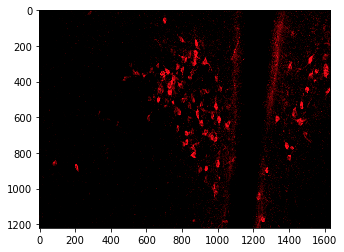

In [2]:
image = sk.io.imread('https://raw.githubusercontent.com/alexiawilliams/pythonfinalproject/master/PVN.png')

## checking that the image loaded properly
fig = plt.figure(1)
plt.imshow(image)
plt.show()

In [3]:
## defining a class that contains a variety of functions for cell counting
### arising issues: we have to keep defining img (the same way we do above within each function). if we call 'sk.io.imread(image) we get 
### an error about not being able to read in numpy arrays. however if we don't read the image in as a numpy array from the start, 
### (the first lines of code) morph_count doesn't work there has to be a way to forego re-calling the image at all once it's 
### defined within the class? so instead of starting each function with img = sk.io.imread(x), we can just skip that line entirely?
### if we can do that, then these should all run fine

class cellector():
    def __init__(self,image):
        plt.imshow(image)
        plt.show()
        #when the class initializes, it prints the image 
        
    def separate_color(self):
        img = sk.io.imread('https://raw.githubusercontent.com/alexiawilliams/pythonfinalproject/master/PVN.png')
        f, axarr = plt.subplots(1,4,figsize=(15,5) )
        for i in range(4):
            axarr[i].imshow(img[:,:,i], cmap='gray')
        #This function separates out the image colors.. I just used this as a quick example to test out how classes work
    
    def morph_count(self):
        img = sk.io.imread('https://raw.githubusercontent.com/alexiawilliams/pythonfinalproject/master/PVN.png')
        
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        fig = plt.figure(2)
        plt.imshow(gray, cmap='gray', interpolation = 'bicubic')
        plt.show()

        ret, bin_im = cv.threshold(gray,20,255,cv.THRESH_BINARY) #70 gives 12, 71 gives 10 but loses one cell

        fig = plt.figure(3)
        plt.imshow(bin_im, cmap='gray', interpolation = 'bicubic')

        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))

        im_erode = cv.erode(bin_im, struct)
        fig = plt.figure(4)
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')
        plt.show()

        im_dilate = cv.dilate(im_erode, struct)
        fig = plt.figure(5)
        plt.imshow(im_dilate, cmap = 'gray', interpolation = 'bicubic')
        plt.show()


        labels = measure.label(im_dilate)
        print(labels.max())
        
        # this code takes in an image and converts it to grayscale, defines a threshold based on color, selects objects within 
        # that range, rids of anything not in that range, and then reports back the number of remaining objects.


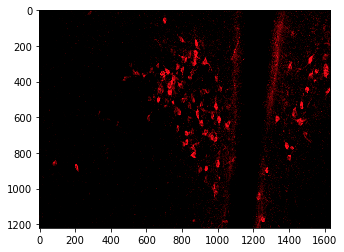

In [4]:
# so we can pass our image, which is pvnOT, through our class, which prints the image when it initializes
pvncounts = cellector(image)

#Then that image is then stored within the variable pvncounts 
#and this allows us to use that same image, but access different functions we made in the class
#so we can call the function separate_color, which we defined in our cellector class

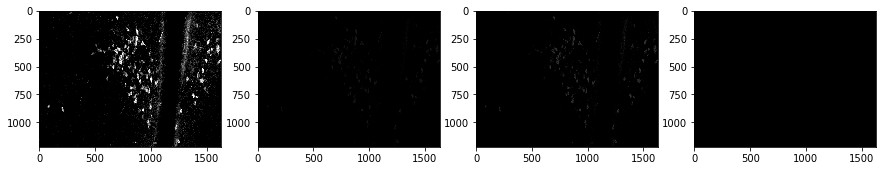

In [5]:
# The next step is to just add more functions to cellector class, and then we can call them easily 

pvncounts.separate_color()

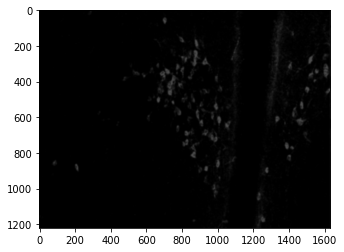

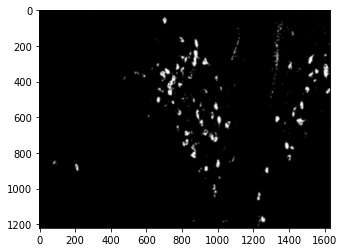

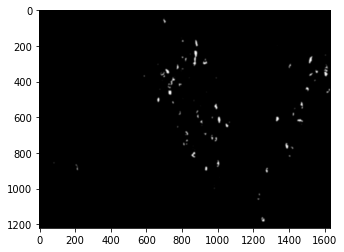

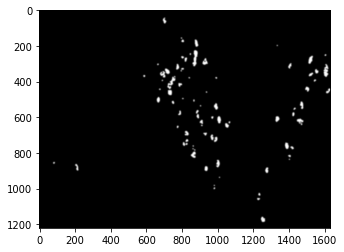

83


In [6]:
pvncounts.morph_count()